# MA934 - class 2

## Deadline: 12:00 noon 15 October 2020

You must make **at least one commit** to your repository **per computational task** below - usually more.

For this assignment, **you must create a new module** called MA934Sorting.jl (or something similar) to contain the implementations that you write.

Use __[Revise.jl](https://timholy.github.io/Revise.jl/stable/)__ during development to avoid having to restart your kernel every time you change code in your module.

In [1]:
### Import all necessary modules.

using Revise
using BenchmarkTools    # Get benchmarks
using LaTeXStrings
using JLD    # IO
using Plots
using DataFrames, GLM    # Odinary Least Squares
using Random
Random.seed!(1234)


### Import the local file Utilities.jl
push!(LOAD_PATH, pwd())
using Utilities

┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278
┌ Info: Precompiling Utilities [top-level]
└ @ Base loading.jl:1278


## Task 1 - insertion sort

Add an implementation of the insertion sort algorithm to your module. Check that it works by sorting some manageably small lists of random integers. The command rand(1:200, 10) creates a list of 10 random intergers in the range 1:200.

In [2]:
println("Try to sort an integer array")
list = [2, 3, 4, 1, 0]
println("Sorting $(list) results in $(insertion_sort(list))")
println("Sorting $(list) reversely results in $(insertion_sort(list, true))")

Try to sort an integer array
Sorting [2, 3, 4, 1, 0] results in [0, 1, 2, 3, 4]
Sorting [2, 3, 4, 1, 0] reversely results in [4, 3, 2, 1, 0]


In [3]:
println("Try to sort a float array")
list = [π^i for i in list]
println("Sorting $(list) results in $(insertion_sort(list))")
println("Sorting $(list) reversely results in $(insertion_sort(list, true))")

Try to sort a float array
Sorting [9.869604401089358, 31.006276680299816, 97.40909103400243, 3.141592653589793, 1.0] results in [1.0, 3.141592653589793, 9.869604401089358, 31.006276680299816, 97.40909103400243]
Sorting [9.869604401089358, 31.006276680299816, 97.40909103400243, 3.141592653589793, 1.0] reversely results in [97.40909103400243, 31.006276680299816, 9.869604401089358, 3.141592653589793, 1.0]


In [4]:
println("Try to sort a string array")
list = ["hello", "wolrd", "this", "is", "a", "test"]
println("Sorting $(list) results in $(insertion_sort(list))")
println("Sorting $(list) reversely results in $(insertion_sort(list, true))")|

Try to sort a string array
Sorting ["hello", "wolrd", "this", "is", "a", "test"] results in ["a", "hello", "is", "test", "this", "wolrd"]


LoadError: syntax: incomplete: premature end of input

In [5]:
println("Try to sort another string array")
println("The Unicode of 🍌 (banana) is $(codepoint('🍌')).")
println("The Unicode of 🍎 (apple) is $(codepoint('🍎')).")
println("The Unicode of 🍵 (tea) is $(codepoint('🍵')).")
list = ["🍵", "🍌", "🍎"]
println("Sorting $(list) results in $(insertion_sort(list))")
println("Sorting $(list) reversely results in $(insertion_sort(list, true))")

Try to sort another string array
The Unicode of 🍌 (banana) is 127820.
The Unicode of 🍎 (apple) is 127822.
The Unicode of 🍵 (tea) is 127861.
Sorting ["🍵", "🍌", "🍎"] results in ["🍌", "🍎", "🍵"]
Sorting ["🍵", "🍌", "🍎"] reversely results in ["🍵", "🍎", "🍌"]


In [6]:
println("Try to sort a char array")
list = ['g', 'h', 'e', 'f', 'a', 'b', 'c', 'd']
println("Sorting $(list) results in $(insertion_sort(list))")
println("Sorting $(list) reversely results in $(insertion_sort(list, true))")

Try to sort a char array
Sorting ['g', 'h', 'e', 'f', 'a', 'b', 'c', 'd'] results in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
Sorting ['g', 'h', 'e', 'f', 'a', 'b', 'c', 'd'] reversely results in ['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']


In [7]:
println("Try to sort a random-integer array")
list = rand(1:200, 10)
println("Sorting $(list) results in $(insertion_sort(list))")
println("Sorting $(list) reversely results in $(insertion_sort(list, true))")

Try to sort a random-integer array
Sorting [20, 75, 149, 25, 190, 31, 197, 132, 165, 121] results in [20, 25, 31, 75, 121, 132, 149, 165, 190, 197]
Sorting [20, 75, 149, 25, 190, 31, 197, 132, 165, 121] reversely results in [197, 190, 165, 149, 132, 121, 75, 31, 25, 20]


## Task 2 - mergesort

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function interlaces them to return an array of length n+m whose elements are sorted in ascending order:

```Julia
function interlace(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], interlace(A[2:end], B))
    else
        return vcat([B[1]], interlace(A, B[2:end]))
    end    
end
```

Add this function to your module and use it to implement the mergesort algorithm. Check that it works.

In [8]:
### The mergesort code with this recursive interlace function is called merge_sort1
println("Try to sort an integer array")
list = [2, 3, 4, 1, 0]
println("Sorting $(list) results in $(merge_sort1(list))")

Try to sort an integer array
Sorting [2, 3, 4, 1, 0] results in [0, 1, 2, 3, 4]


In [9]:
println("Try to sort a random-integer array")
list = rand(1:200, 10)
println("Sorting $(list) results in $merge_sort1(list)")

Try to sort a random-integer array
Sorting [17, 62, 149, 89, 58, 137, 113, 164, 182, 180] results in merge_sort1(list)


## Task 3 - fixing mergesort

You will probably find that your mergesort algorithm fails for moderately array lengths (on my laptop, I couldn't do arrays of length $2^{15}$ for example.) The reason for this is that there are too many recursions: the code quickly exceeds the maximum allowed recursion depth. To fix this, write a non-recursive implementation of the ```interlace()``` function. Test your ```mergesort()``` function using the non-recursive version. It should work better.

In [10]:
### The mergesort code using the iterative interlace function is called merge_sort2
println("Try to sort an integer array")
list = [2, 3, 4, 1, 0]
println("Sorting $(list) results in $(merge_sort2(list))")

Try to sort an integer array
Sorting [2, 3, 4, 1, 0] results in [0, 1, 2, 3, 4]


In [11]:
println("Try to sort a random-integer array")
list = rand(1:200, 10)
println("Sorting $(list) results in $merge_sort1(list)")

Try to sort a random-integer array
Sorting [134, 85, 180, 192, 119, 10, 1, 4, 26, 130] results in merge_sort1(list)


In [12]:
### Let's see the performance differences of these two functions.

println("Try to sort an integer array")
list = [2, 3, 4, 1, 0]
println("Use the recursion version of interlace( )")
@btime merge_sort1($list)
println("Use the iteration version of interlace( )")
@btime merge_sort2($list)
sorted1 = merge_sort1(list)
sorted2 = merge_sort2(list)
println("sorted1 == sorted2 ? ", sorted1 == sorted2)
println("Sorting $(list) results in $(sorted1)")

Try to sort an integer array
Use the recursion version of interlace( )
  682.449 ns (32 allocations: 3.03 KiB)
Use the iteration version of interlace( )
  459.538 ns (20 allocations: 1.98 KiB)
sorted1 == sorted2 ? true
Sorting [2, 3, 4, 1, 0] results in [0, 1, 2, 3, 4]


In [13]:
println("Try to sort a random-integer array")
list = rand(1:200, 10)
println("Use the recursion version of interlace( )")
@btime merge_sort1($list)
println("Use the iteration version of interlace( )")
@btime merge_sort2($list)
sorted1 = merge_sort1(list)
sorted2 = merge_sort2(list)
println("sorted1 == sorted2 ? ", sorted1 == sorted2)
println("Sorting $(list) results in $(sorted1)")

Try to sort a random-integer array
Use the recursion version of interlace( )
  1.874 μs (87 allocations: 8.63 KiB)
Use the iteration version of interlace( )
  1.021 μs (45 allocations: 4.64 KiB)
sorted1 == sorted2 ? true
Sorting [91, 10, 149, 185, 97, 191, 83, 41, 135, 1] results in [1, 10, 41, 83, 91, 97, 135, 149, 185, 191]


## Task 4 - benchmarking

Measure the runtime of your insertion sort and mergesort functions for random arrays of integers in the range $2$ to $2^{20}$. **Save your results to a file**.

This is the potentially complicated part of this task. Here are some pointers:
* Use BenchmarkTools.jl to do the timing rather than the @timed macro. In my experience it works better. See https://github.com/JuliaCI/BenchmarkTools.jl
* Be careful if your algorithms run in-place: BenchmarkTools runs a function multiple times to get an average runtime. Your results will be non-representative if each of these runs ends up sorting an array that was already sorted by the first pass!
* A really useful package for reading and writing arrays (and other Julia types) to files is JLD.jl. I recommend that you use this. See : https://github.com/JuliaIO/JLD.jl

In [14]:
len = 20
times_insertion = zeros(len)
times_merge = zeros(len)

for i in 1: len
    println(i) # Just to show how many iterations have been done.
    rand_arr = rand(Int, 2^i)
    bm1 = @benchmark insertion_sort(arr) setup=(arr = copy($rand_arr))
    bm2 = @benchmark merge_sort2(arr) setup=(arr = copy($rand_arr))
    times_insertion[i] = median(bm1.times)
    times_merge[i] = median(bm2.times)
end

save("benchmarks2.jld", "Insertion Sort", times_insertion, "Merge Sort", times_merge)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


## Task 5 - empirical analysis of computational complexity

**Load your benchmarking results back from the file** and plot them on a log-log scale. Fit your data to determine how the computational cost scales with the length of the input array for large array sizes. How does this compare to theoretical expectations?

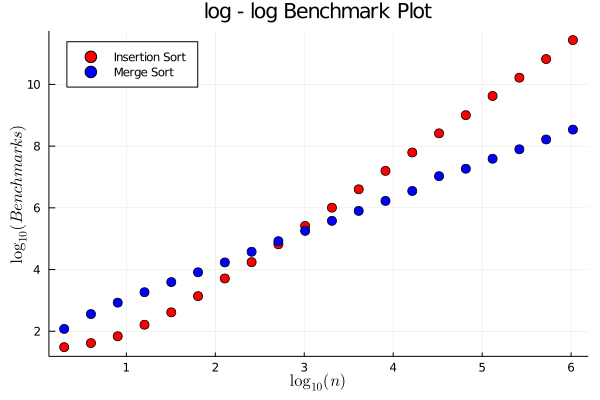

In [15]:
len = 20
dict = load("benchmarks2.jld")
t_insertion = dict["Insertion Sort"]
t_merge = dict["Merge Sort"]
log_x = log10.([2^i for i in 1: len])
log_t_insertion = log10.(t_insertion)
log_t_merge = log10.(t_merge)

p = plot(log_x, log_t_insertion, seriestype=:scatter,label="Insertion Sort",
    legend=:topleft, title="log - log Benchmark Plot", xlabel=L"$\log_{10}(n)$",
    ylabel=L"$\log_{10}(Benchmarks)$", markersize=5, markercolor="red")
plot!(log_x, log_t_merge, seriestype=:scatter,label="Merge Sort",
    markersize=5, markercolor="blue")

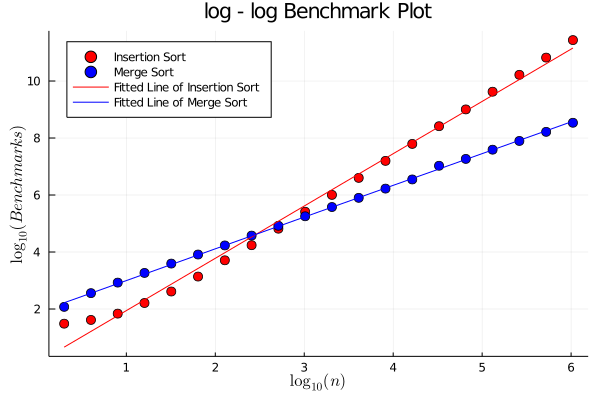

In [16]:
# Now fit the data with Odinary least square
# Fit the data of Insertion Sort first
data1 = DataFrame(X = log_x, Y = log_t_insertion)
ols1 = lm(@formula(Y ~ X), data1)
coef1 = coef(ols1) #coef1[1] is the intercept, coef1[2] is the slope
a1 = coef1[2]
b1 = coef1[1]
f1(x) = a1 * x + b1
plot!(f1, log_x[1], log_x[len], label="Fitted Line of Insertion Sort", color="red")
# Fit the Data of Merge Sort
data2 = DataFrame(X = log_x, Y = log_t_merge)
ols2 = lm(@formula(Y ~ X), data2)
coef2 = coef(ols2) #coef2[1] is the intercept, coef2[2] is the slope
a2 = coef2[2]
b2 = coef2[1]
f2(x) = a2 * x + b2
plot!(f2, log_x[1], log_x[len], label = "Fitted Line of Merge Sort", color="blue")

In [17]:
savefig(p, "benchmarkplot2.pdf")

From the plot, one can easily find that when $n$ is small, insertion sort is actually faster than merge sort. From my perspective, I think this is because the definition of ```merge_sort``` uses recursion,
which is slower than iteration.

However, when $n$ is large, the difference of computational complexity becomes more and more obvious. The computaional cost of insertion sort is $\mathcal{O}(n^2)$, while that of merge sort is $\mathcal{O}(n\log(n))$. Thus, it is reasonable to see that the fitted line of merge sort lies below that of insertion sort.

Another point to make here is that after taking log transformation, the data of insertion sort should be expected to lie on a line ( $\log(n^2)=2\log(n)$ ) in the log-log plot, but the data of merge sort should not ( $\log(n\log(n))=\log(n)+\log(\log(n))$ ). It seems that the blue points in the plot fall on a line, but it is actually not. This effect is due to comparatively small $n$, whih makes the term $\log(\log(n))$ almost negligible. Actually, we can print out slopes of the above two lines.

In [18]:
println("The slope of Insertion Sort Line is", " ", coef1[2])
println("The intercept of Insertion Sort Line is", " ", coef1[1])
println("The slope of Insertion Sort Line is", " ", coef2[2])
println("The intercept of Insertion Sort Line is", " ", coef2[1])

The slope of Insertion Sort Line is 1.8350845221588805
The intercept of Insertion Sort Line is 0.1096659065990776
The slope of Insertion Sort Line is 1.1136612352424982
The intercept of Insertion Sort Line is 1.884713347256329


The slope of the fitted line corresponding to insertion sort is about $1.82$, which is very near $2$. The slight difference is probably casued by a relatively small sample space.

As for the slope of the line of merge sort, its slope is greater than $1$, due to the existence of $\log(\log(n))$.